In [62]:
import os

import torchvision
import torch

import numpy as np
import matplotlib.pyplot as plt

from models import ModelsWithIMAGENET1K_V1

# Table of Contents
Backend
- Get Files Names

Visualizations
- Same Frequency, Different Models
- Same Model, Different Frequencies

# Get File Names

In [37]:
subset_of_models = ModelsWithIMAGENET1K_V1()
models_to_check = list(subset_of_models.models.keys())
files = os.listdir('.')
matching_files_with_models = [
    (file, model) for file in files for model in models_to_check if model in file
]

maskrcnn_resnet50_fpn doesn't have crop_size
quantized_googlenet doesn't have crop_size
quantized_inception_v3 doesn't have crop_size
quantized_mobilenet_v2 doesn't have crop_size
quantized_mobilenet_v3_large doesn't have crop_size
quantized_resnet18 doesn't have crop_size
quantized_resnet50 doesn't have crop_size
quantized_resnext101_32x8d doesn't have crop_size
quantized_resnext101_64x4d doesn't have crop_size
quantized_shufflenet_v2_x0_5 doesn't have crop_size
quantized_shufflenet_v2_x1_0 doesn't have crop_size
quantized_shufflenet_v2_x1_5 doesn't have crop_size
quantized_shufflenet_v2_x2_0 doesn't have crop_size
raft_large doesn't have crop_size
raft_small doesn't have crop_size
regnet_y_128gf doesn't have crop_size
vit_h_14 doesn't have crop_size


In [80]:
path = '/scratch/cm6627/equivariance/experiments/001_AccuracyDiffeos/'
all_data = {model_name: torch.load(path+file_name) for file_name, model_name in matching_files_with_models}
alphabetical_all_data = {key: all_data[key] for key in sorted(all_data)}

/state/partition1/job-53587495/ipykernel_2525319/2800016652.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_data = {model_name: torch.load(path+file_name) for file_n

# Same Model, Different Frequencies

In [149]:
# All choices of model
list(alphabetical_all_data.keys()), len(list(alphabetical_all_data.keys()))

(['alexnet',
  'convnext_tiny',
  'densenet121',
  'densenet169',
  'efficientnet_b0',
  'googlenet',
  'mnasnet0_5',
  'mnasnet0_75',
  'mnasnet1_0',
  'mnasnet1_3',
  'mobilenet_v2',
  'mobilenet_v3_large',
  'mobilenet_v3_small',
  'regnet_x_1_6gf',
  'regnet_x_400mf',
  'regnet_x_800mf',
  'regnet_y_1_6gf',
  'regnet_y_3_2gf',
  'regnet_y_400mf',
  'regnet_y_800mf',
  'resnet101',
  'resnet18',
  'resnet34',
  'resnet50',
  'resnext50_32x4d',
  'shufflenet_v2_x0_5',
  'shufflenet_v2_x1_0',
  'shufflenet_v2_x1_5',
  'shufflenet_v2_x2_0',
  'squeezenet1_0',
  'squeezenet1_1',
  'vgg11',
  'vit_b_32'],
 33)

/state/partition1/job-53587495/ipykernel_2525319/3513129294.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  y = np.array(alphabetical_all_data[model_name][freq])


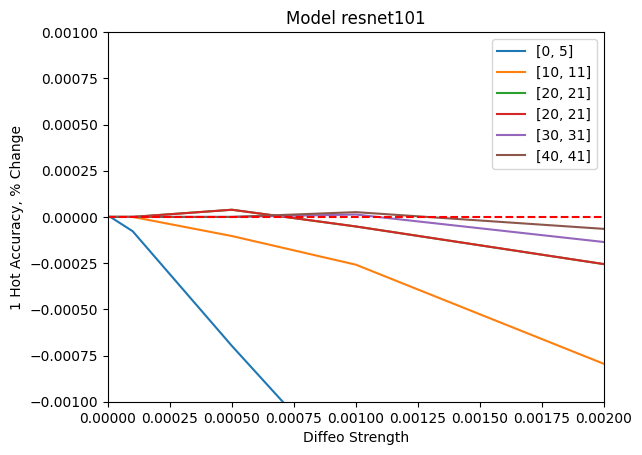

In [148]:
### Parameters
model_name = list(alphabetical_all_data.keys())[20]
xbounds = [0,0.002]
ybounds = [-0.001, 0.001]

### CODE
freqs = ['[0, 5]','[10, 11]','[20, 21]','[20, 21]','[30, 31]','[40, 41]']
x = alphabetical_all_data[list(alphabetical_all_data.keys())[0]]['diffeo_strengths'] 

colors = plt.cm.viridis(np.linspace(0, 1, len(freqs)))
for freq, color in zip(freqs, colors):
    y = np.array(alphabetical_all_data[model_name][freq])
    y = (y - y[0])/y[0]
    plt.plot(x,y, label=freq)
plt.axhline(0.0, linestyle='--', color='red')
if xbounds != None:
    plt.xlim(xbounds)0
if ybounds != None:
    plt.ylim(ybounds)
plt.title(f'Model {model_name}')
plt.xlabel('Diffeo Strength')
plt.ylabel('1 Hot Accuracy, % Change')
plt.legend()

/state/partition1/job-53587495/ipykernel_2525319/2962061713.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  y = np.array(alphabetical_all_data[model_name][freq])


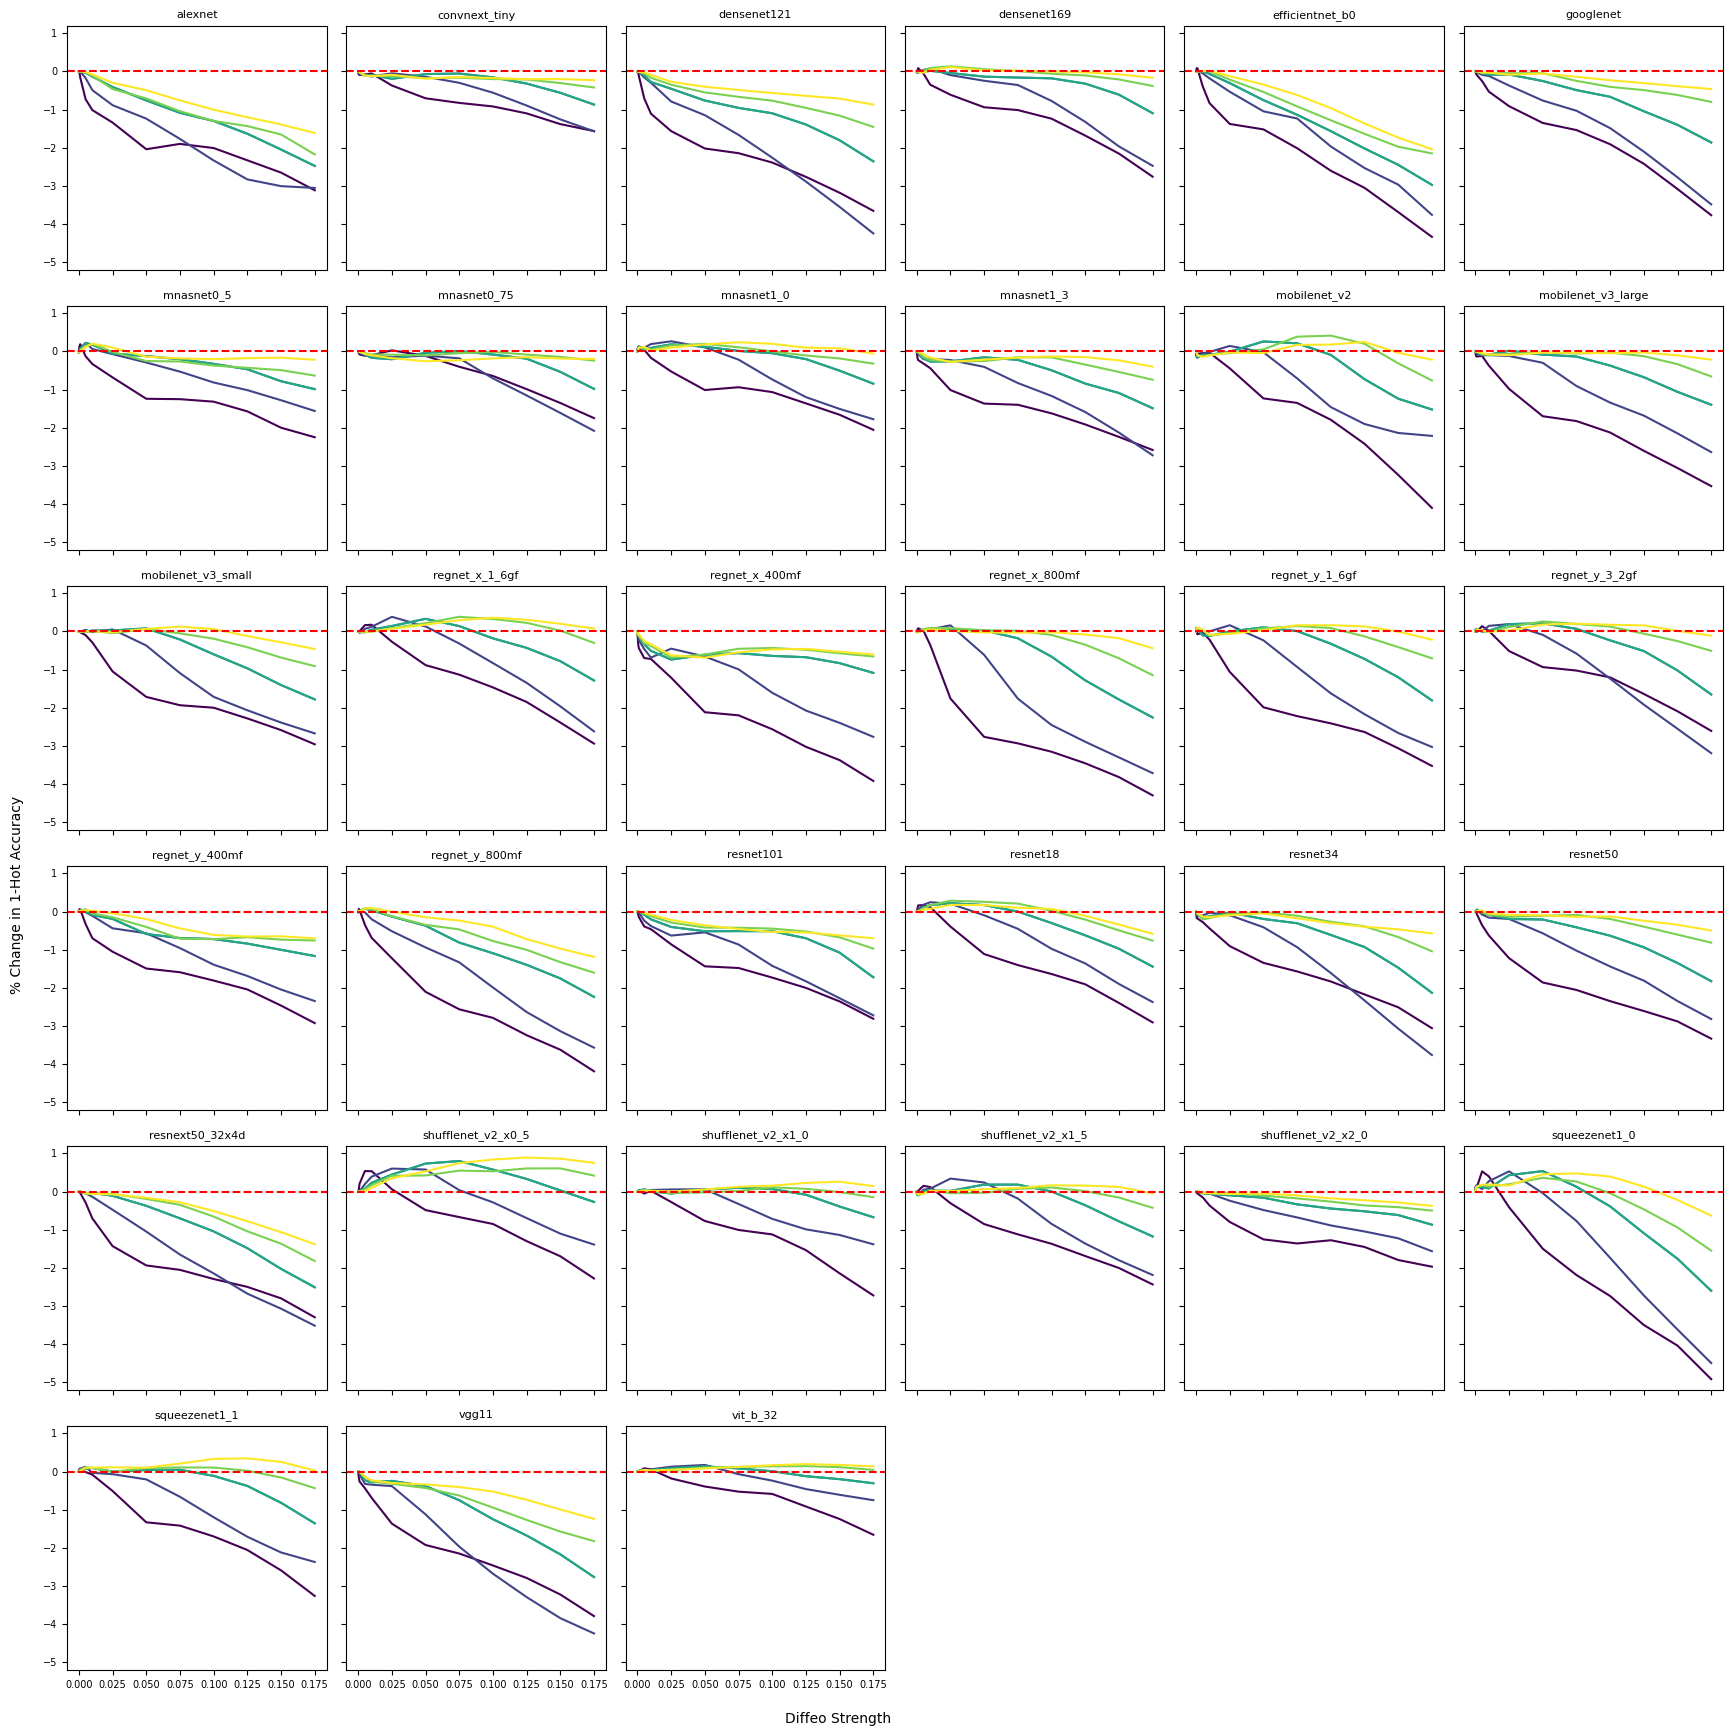

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Define the frequency ranges and grid size
freqs = ['[0, 5]', '[10, 11]', '[20, 21]', '[20, 21]', '[30, 31]', '[40, 41]']
num_models = len(alphabetical_all_data.keys())
grid_size = int(np.ceil(np.sqrt(num_models)))  # Calculate grid size (square root of number of models)

# Create the subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(18, 18), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each model and plot on a corresponding subplot
for idx, (model_name, ax) in enumerate(zip(alphabetical_all_data.keys(), axes)):
    x = alphabetical_all_data[model_name]['diffeo_strengths']
    colors = plt.cm.viridis(np.linspace(0, 1, len(freqs)))
    
    # Plot data for each frequency
    for freq, color in zip(freqs, colors):
        y = np.array(alphabetical_all_data[model_name][freq])
        y = (y - y[0]) / y[0] * 100 # Normalize the data
        ax.plot(x, y, label=freq, color=color)
    
    # Add a zero line
    ax.axhline(0.0, linestyle='--', color='red')
    
    # Add title for each subplot
    ax.set_title(f'{model_name}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=7)

# Hide any unused subplots
for ax in axes[num_models:]:
    ax.set_visible(False)

# Set common labels
fig.text(0.5, 0.04, 'Diffeo Strength', ha='center')
fig.text(0.04, 0.5, '% Change in 1-Hot Accuracy', va='center', rotation='vertical')

# Adjust layout and add legend
fig.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.legend(freqs, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(freqs), fontsize=8)

# Display the grid of plots
plt.show()


In [200]:
import pandas as pd

In [216]:
name = 'resnet18'

def get(name):
    keys = ['[0, 5]','[10, 11]','[20, 21]','[20, 21]','[30, 31]','[40, 41]']
    baseline_pct = float(alphabetical_all_data[name]['[0, 5]'][0])
    max_value = np.array([alphabetical_all_data[name][key] for key in keys]).max()
    percent_change = float((max_value - baseline_pct) / baseline_pct * 100)
    baseline = float(baseline_pct) * 100
    return percent_change, baseline

df = pd.DataFrame(np.array([get(name) for name in list(alphabetical_all_data.keys())]))
df = df.sort_values(by=[1])
df
# Left column: Maximum percent change in accuracy
# Right column: Baseline accuracy

,0,1
0,0.000000,54.299998
30,0.346155,57.199997
29,0.536205,57.999998
25,0.893154,59.899998
12,0.127782,67.299998
31,0.008788,68.299997
6,0.226777,68.349999
21,0.283420,68.449998
26,0.258518,70.400000
5,0.000000,70.749998


Text(0.5, 1.0, 'Does Baseline Accuracy Affect Result?, different models')

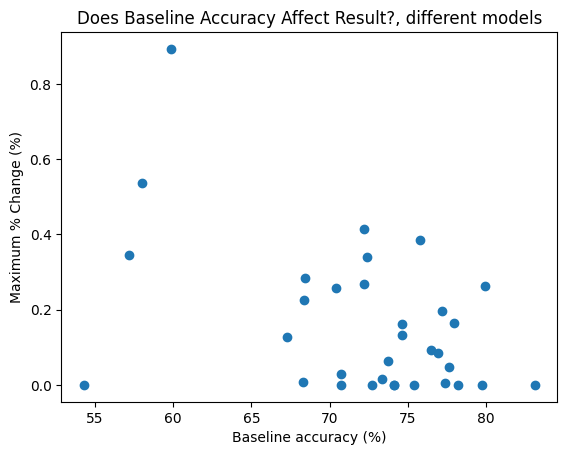

In [222]:
x = df[1].values
y = df[0].values

plt.scatter(x,y)
plt.ylabel('Maximum % Change (%)')
plt.xlabel('Baseline accuracy (%)')
plt.title('Does Baseline Accuracy Affect Result?, different models')

# Same Freq, Different Model

/state/partition1/job-53587495/ipykernel_2525319/3240741625.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  freqs = (np.array(values[freq]) - f0) / f0


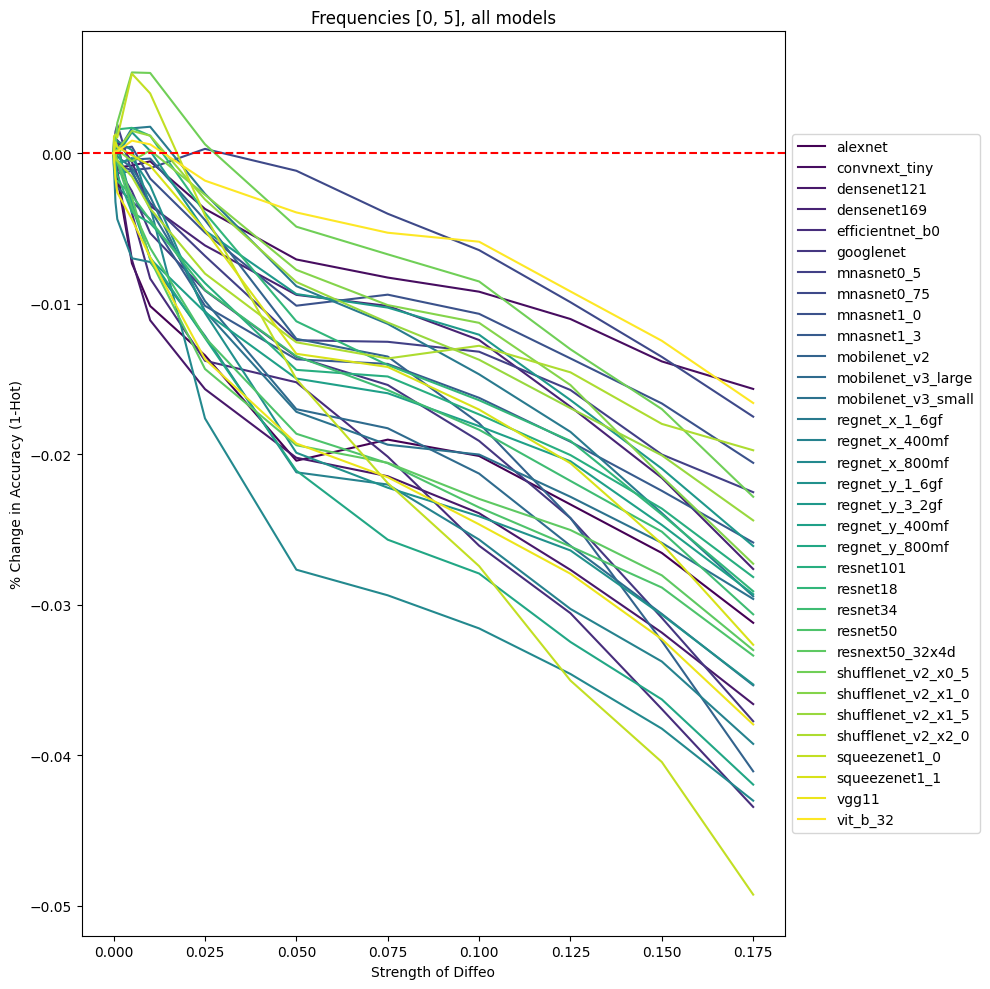

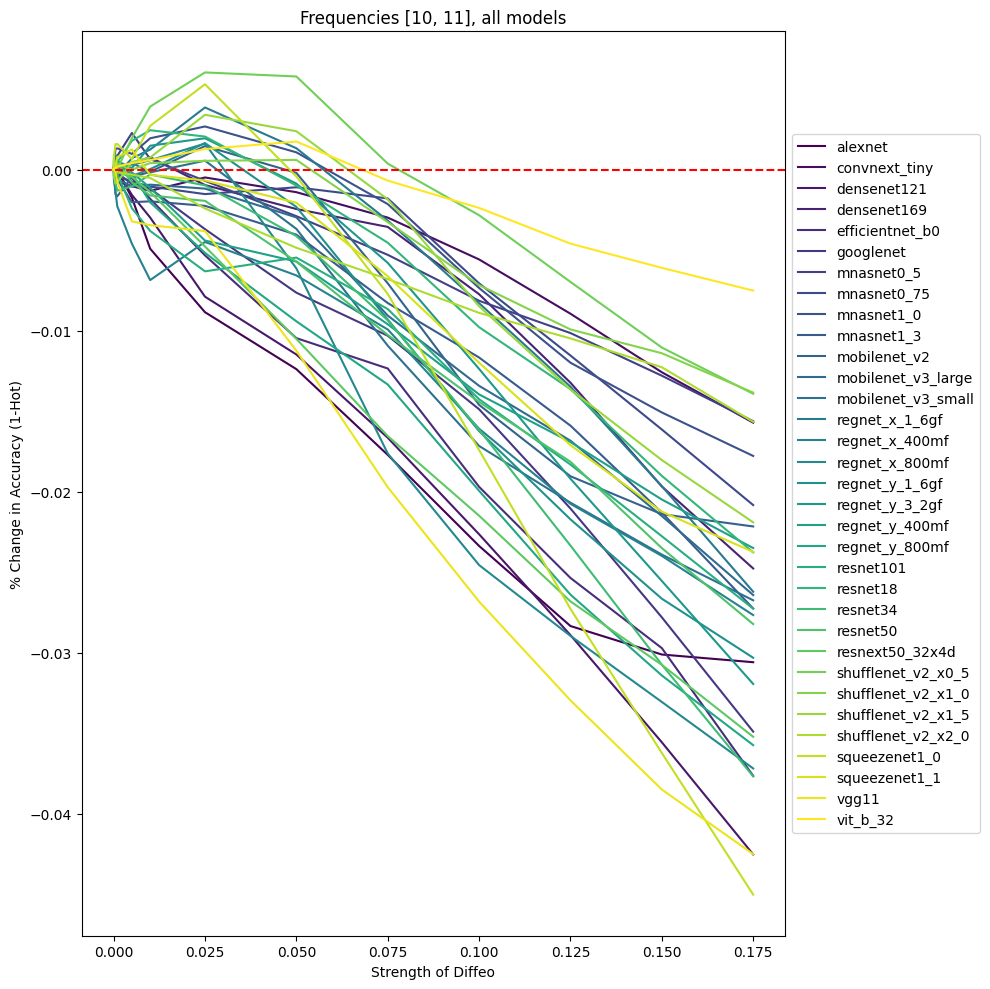

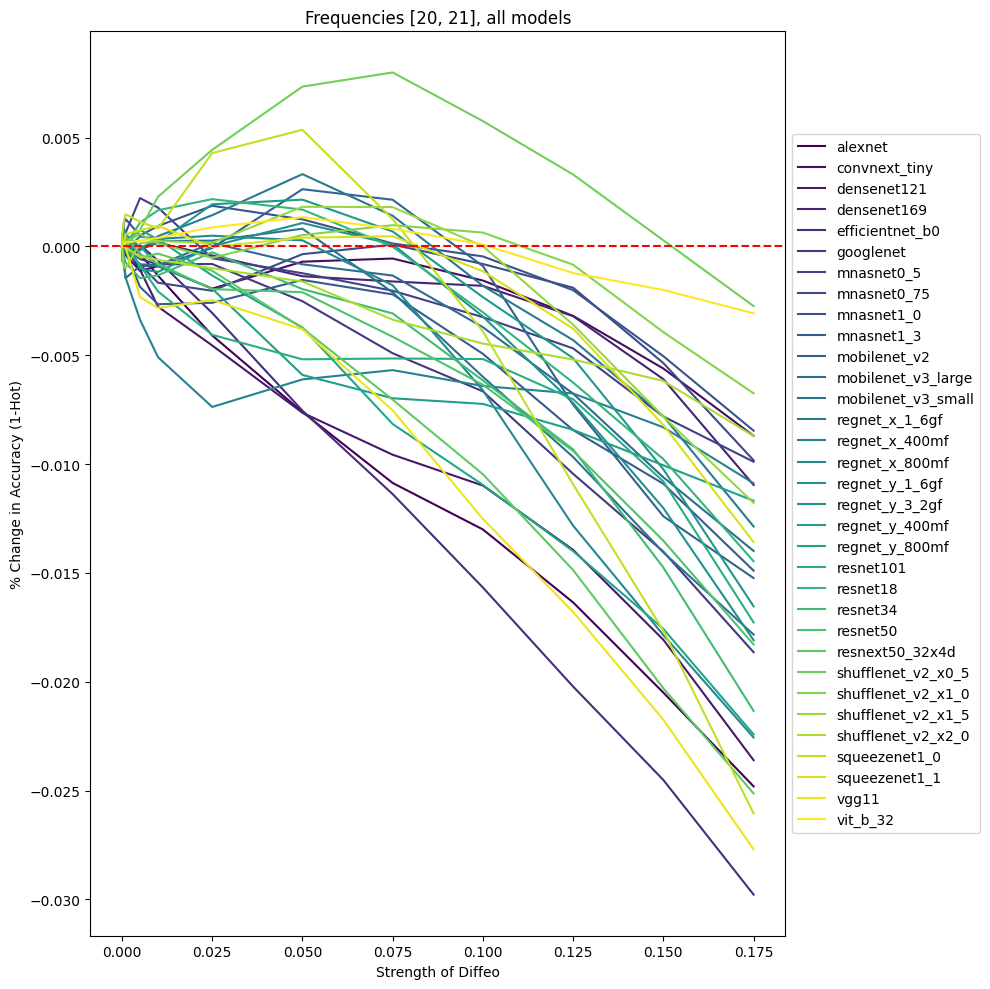

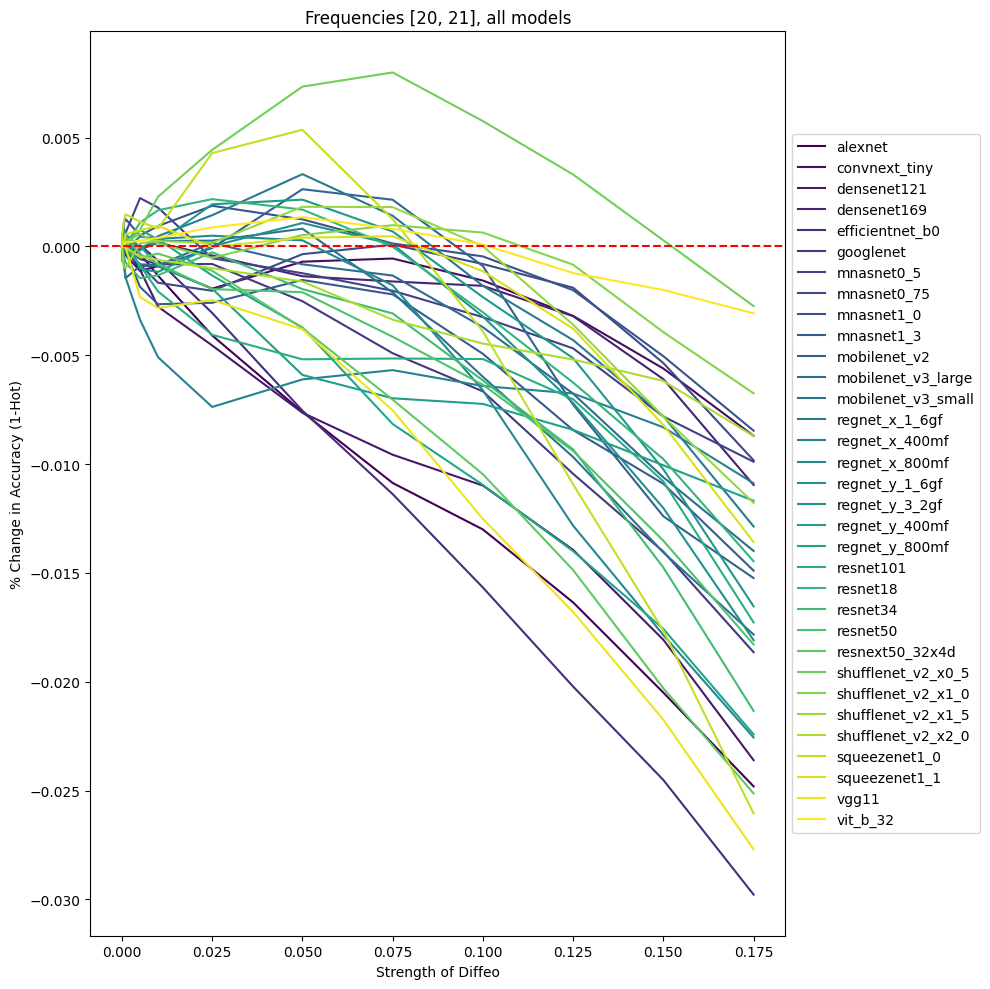

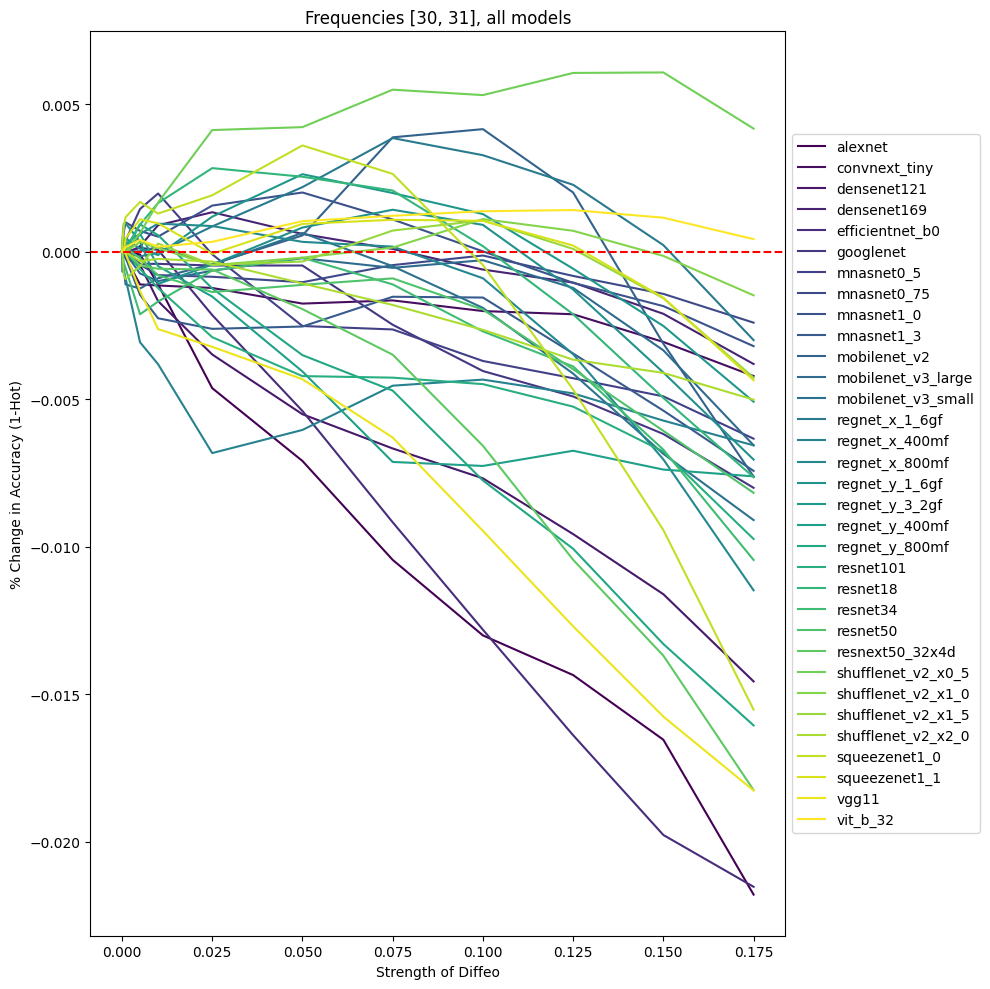

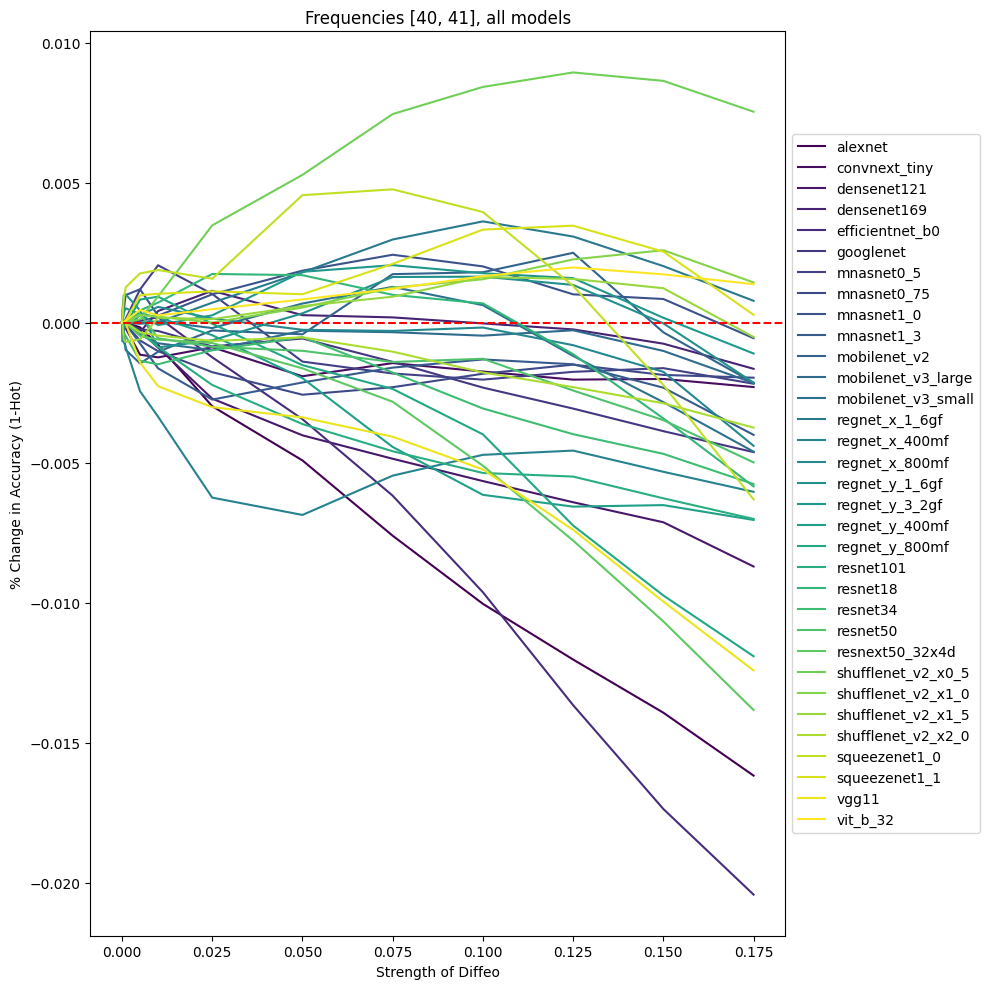

In [114]:
def plot_freq(freq):
    y = {}
    x = alphabetical_all_data[list(alphabetical_all_data.keys())[0]]['diffeo_strengths'] 
    for model_name, values in alphabetical_all_data.items():
        f0 = float(values[freq][0])  
        freqs = (np.array(values[freq]) - f0) / f0
        y[model_name] = freqs
    
    # Create a larger figure
    plt.figure(figsize=(10, 10))  # Width = 10, Height = 6 (inches)
    
    # Generate gradient colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(y)))
    
    # Plot each model with gradient colors
    for (model_name, values), color in zip(y.items(), colors):
        plt.plot(x, values, label=model_name, color=color)
    plt.axhline(0.0, linestyle='--', color='red')
    
    plt.title(f'Frequencies {freq}, all models')
    plt.ylabel('% Change in Accuracy (1-Hot)')
    plt.xlabel('Strength of Diffeo')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Center-right
    plt.tight_layout()  # Adjust layout for the legend to fit
    
    plt.show()

for freq in ['[0, 5]','[10, 11]','[20, 21]','[20, 21]','[30, 31]','[40, 41]']:
    plot_freq(freq)

/state/partition1/job-53587495/ipykernel_2525319/4241045922.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  freqs = (np.array(values[freq]) - f0) / f0


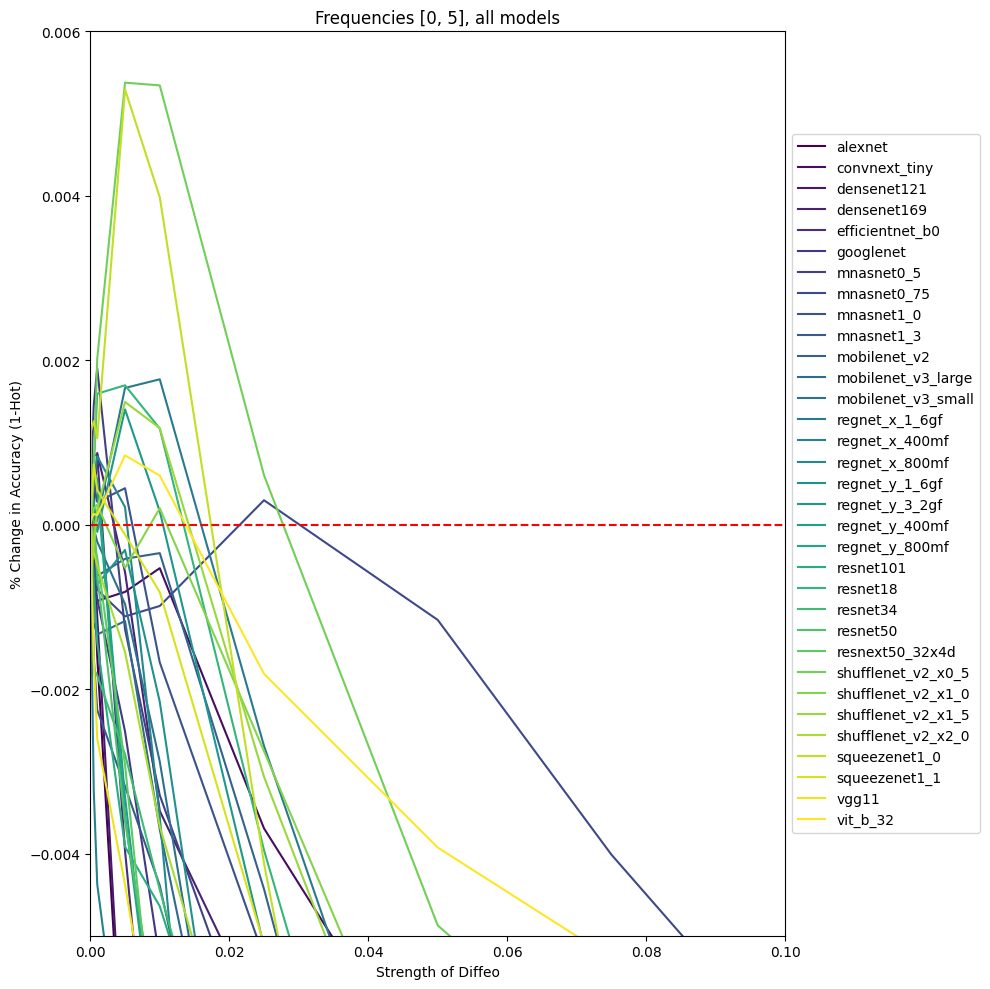

In [158]:
### Parameters 
freq = '[0, 5]'
xbounds = [0,0.1]
ybounds = [-0.005, 0.006]


### Code
y = {}
x = alphabetical_all_data[list(alphabetical_all_data.keys())[0]]['diffeo_strengths'] 
for model_name, values in alphabetical_all_data.items():
    f0 = float(values[freq][0])  
    freqs = (np.array(values[freq]) - f0) / f0
    y[model_name] = freqs
# Create a larger figure
plt.figure(figsize=(10, 10))  # Width = 10, Height = 6 (inches)
# Generate gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, len(y)))
# Plot each model with gradient colors
for (model_name, values), color in zip(y.items(), colors):
    plt.plot(x, values, label=model_name, color=color)
plt.axhline(0.0, linestyle='--', color='red')
# Axis
if xbounds != None:
    plt.xlim(xbounds)
if ybounds != None:
    plt.ylim(ybounds)

# Labels
plt.title(f'Frequencies {freq}, all models')
plt.ylabel('% Change in Accuracy (1-Hot)')
plt.xlabel('Strength of Diffeo')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Center-right
plt.tight_layout()  # Adjust layout for the legend to fit
plt.show()